[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Instance Segmentation on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Oct 18 22:45:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/235.7 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gEHhbRlriKXyhdHp1IEC")
project = rf.workspace("proyecto-computer-vision").project("is-and-cl-dataset")
version = project.version(6)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to IS-and-CL-dataset-6 in yolov11:: 100%|██████████| 3320/3320 [00:00<00:00, 6359.19it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 plots=True

/content
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/IS-and-CL-dataset-6/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fa

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [8]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskF1_curve.png	 train_batch1.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1729291827.94d11254310f.2275.0  train_batch1620.jpg  val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1621.jpg  weights
labels.jpg					    train_batch1622.jpg


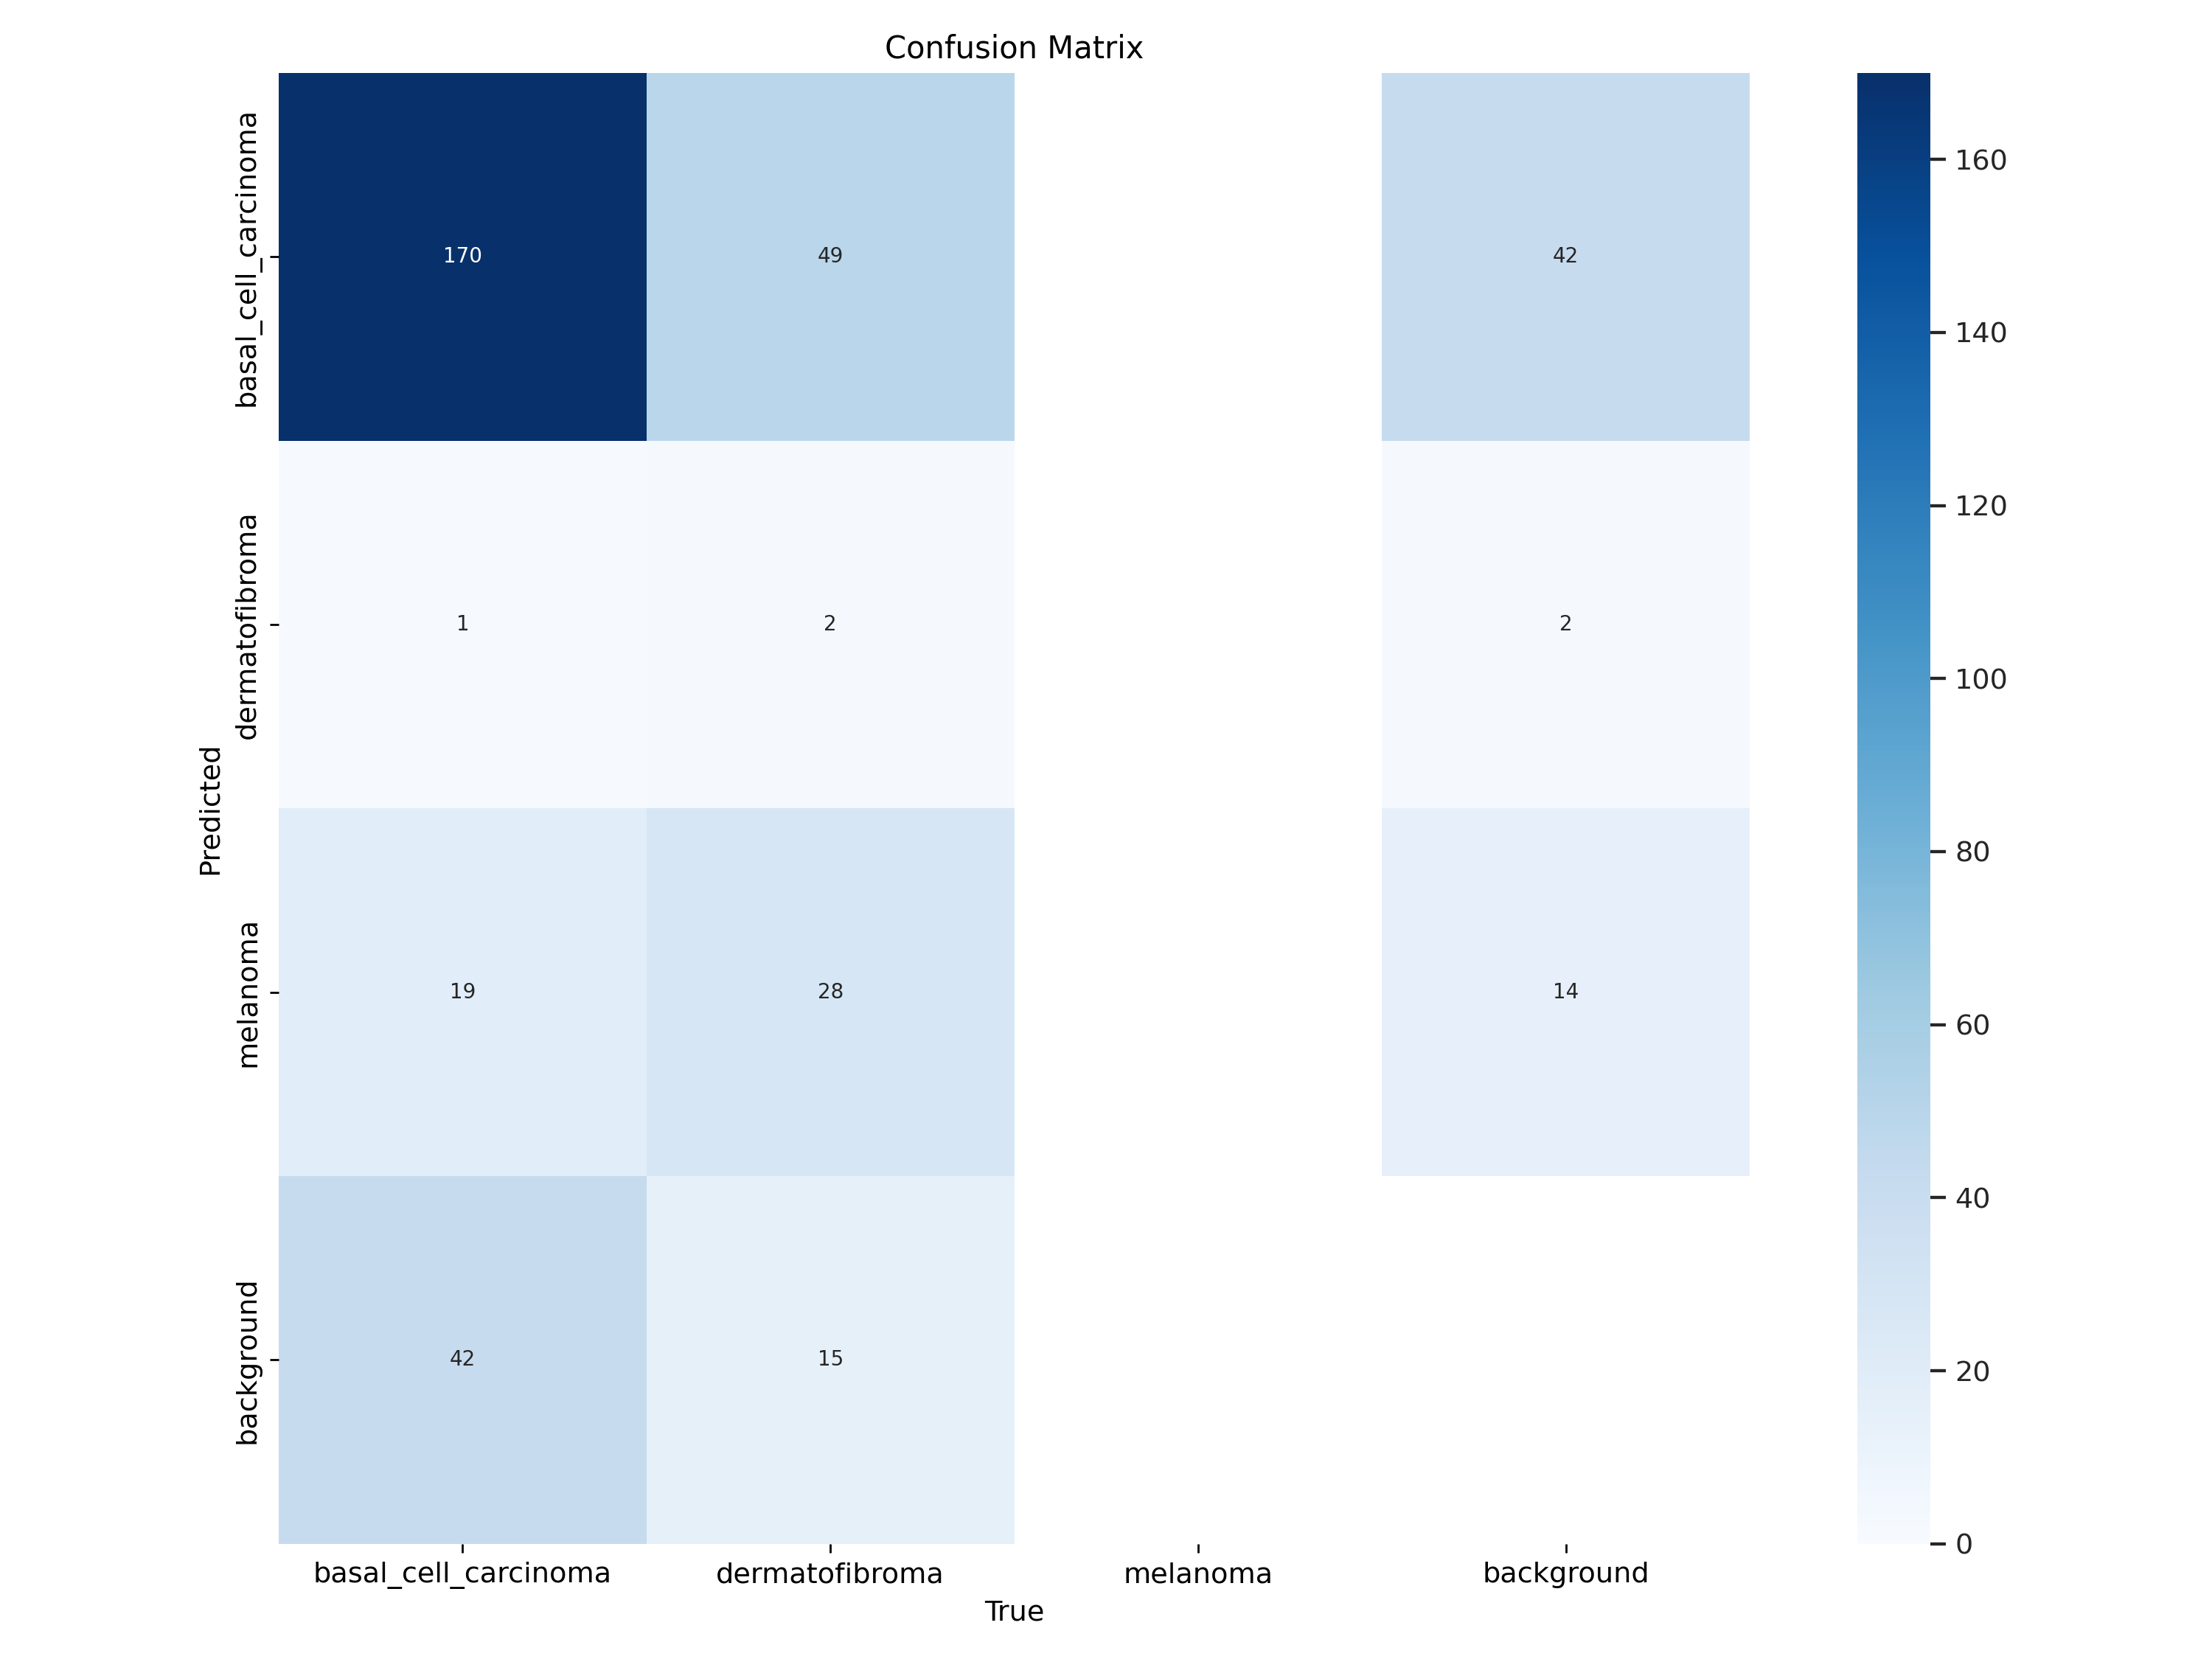

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

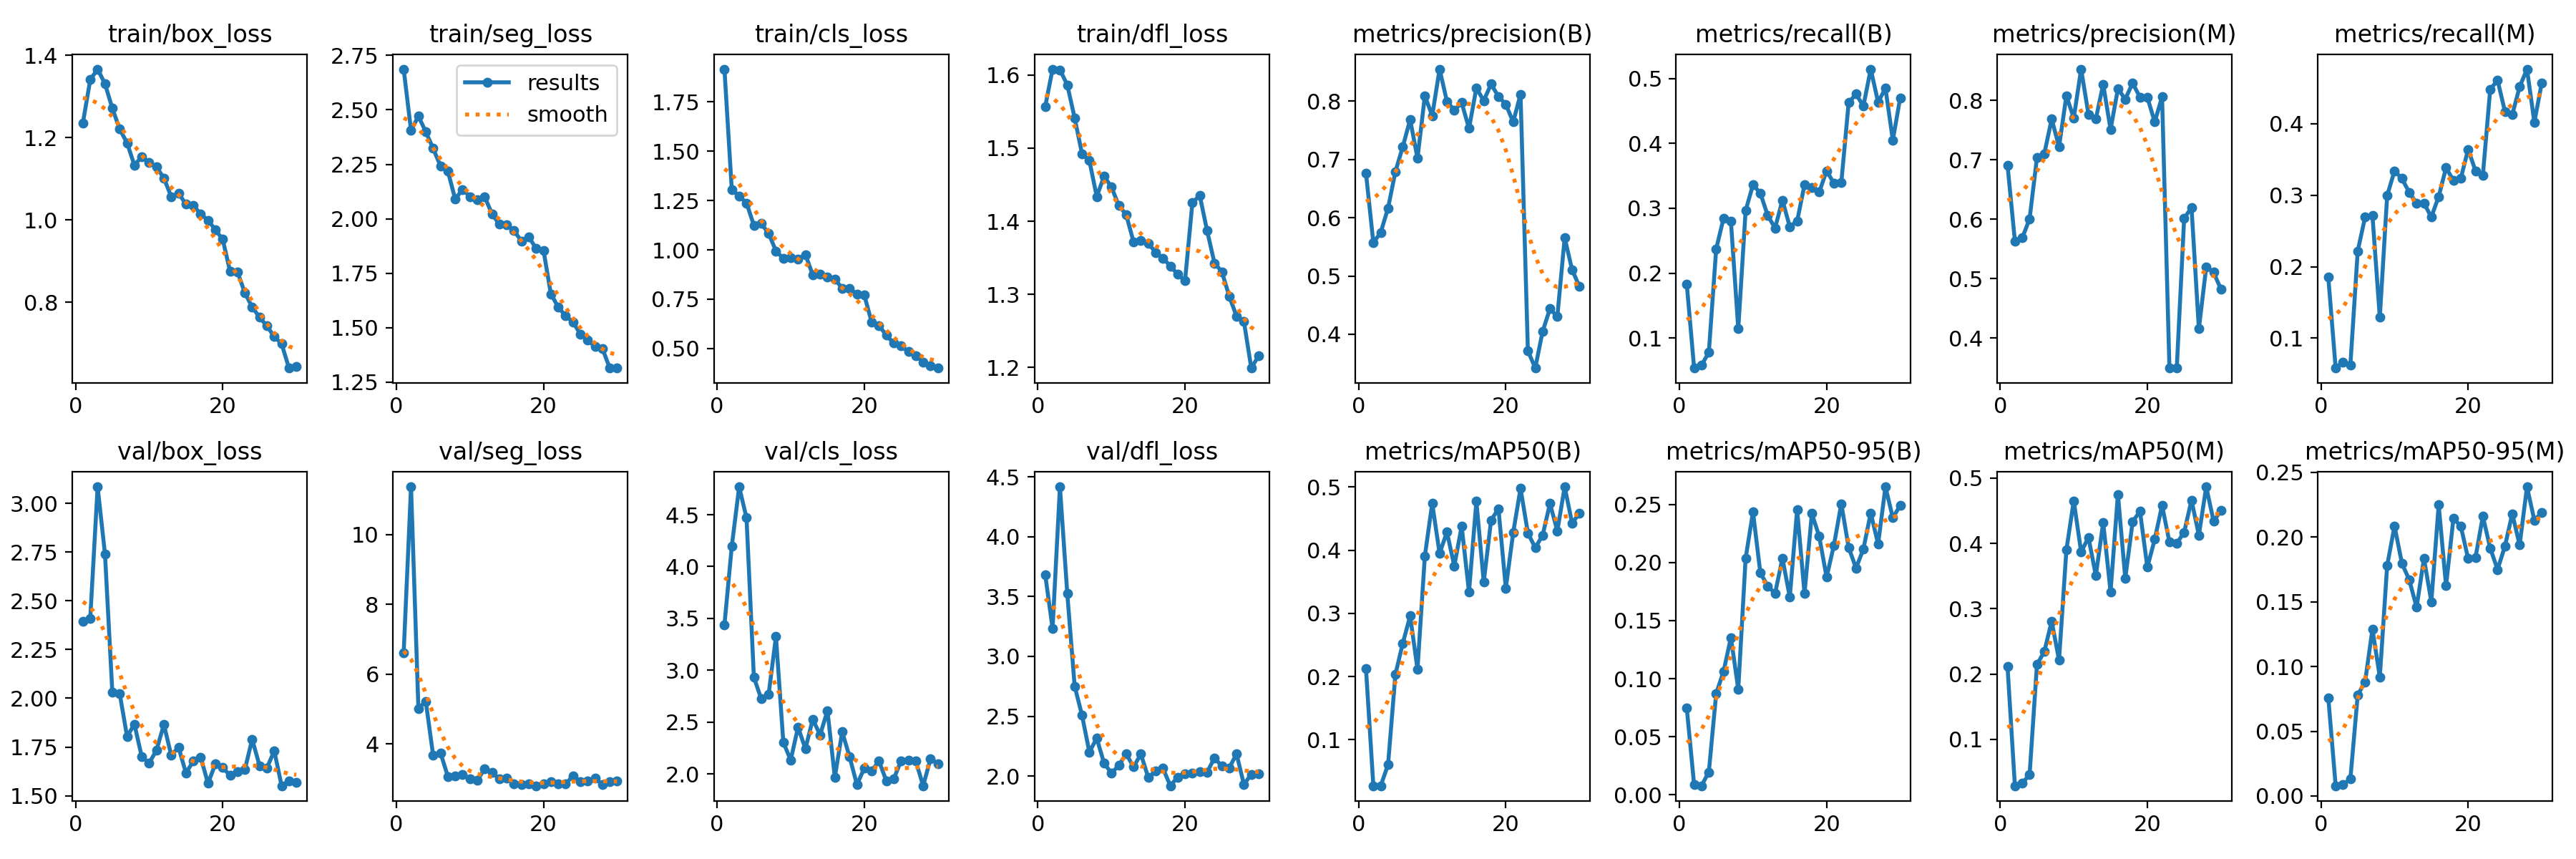

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

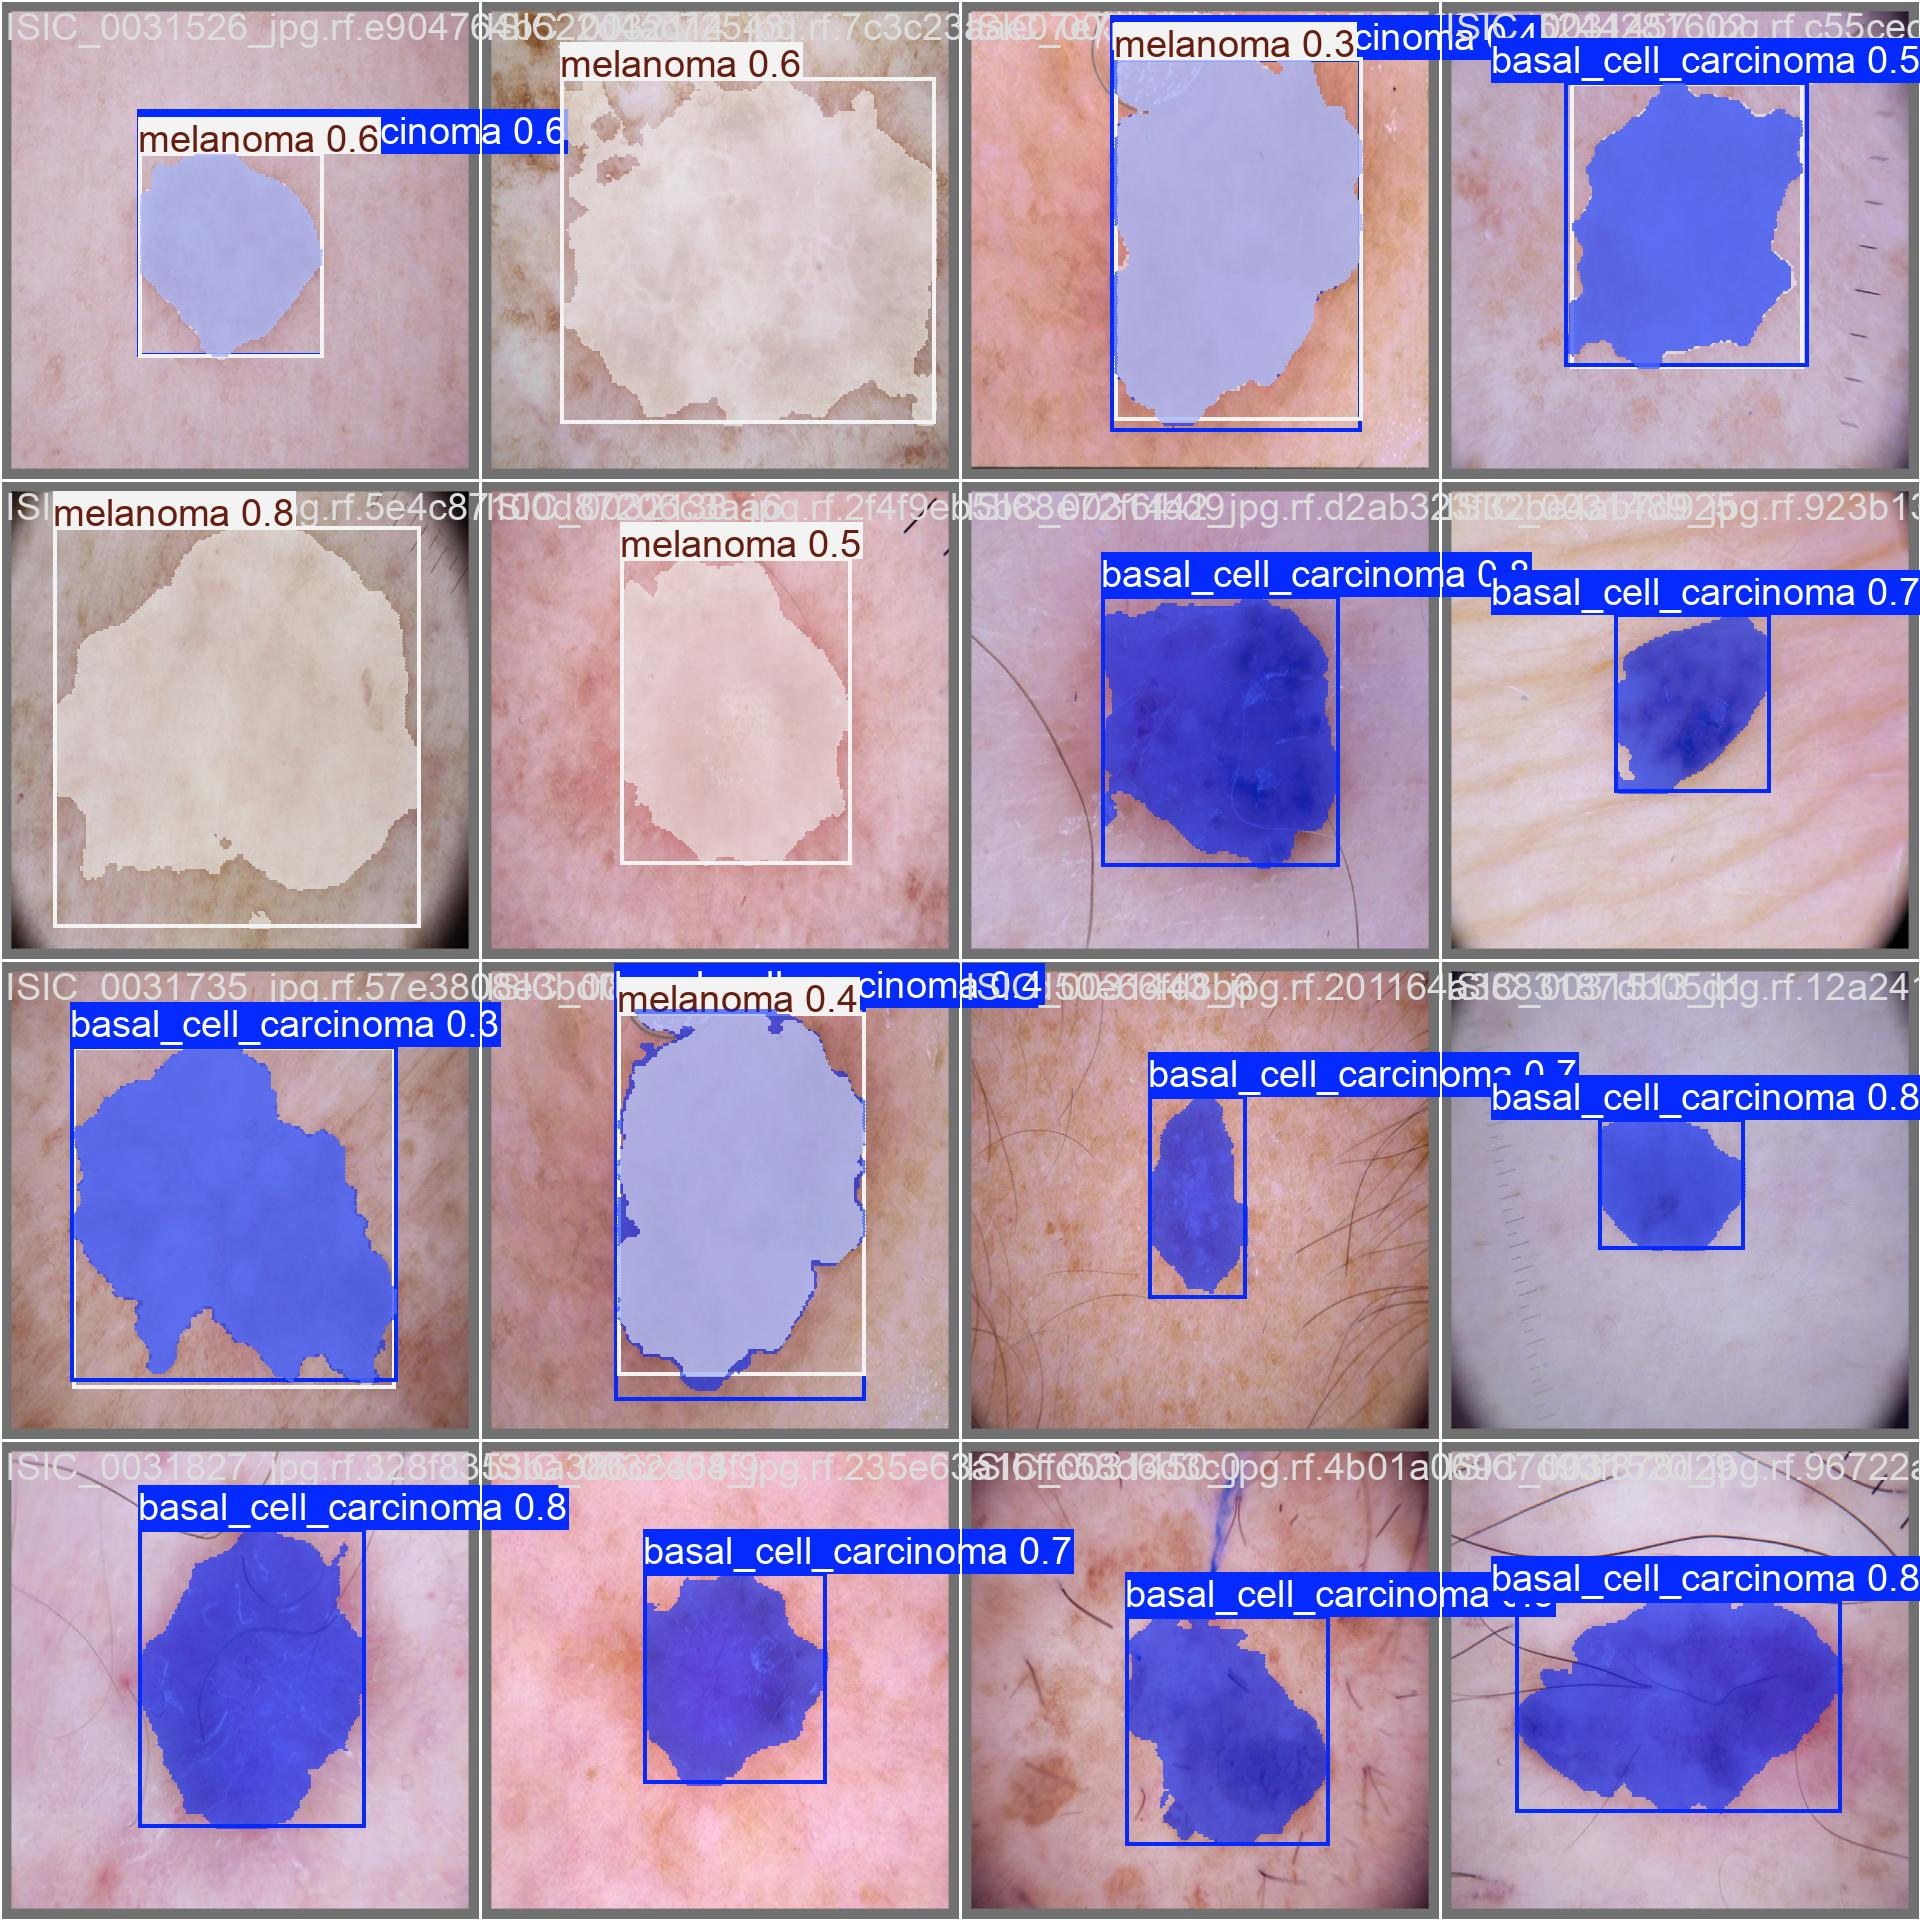

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [12]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /content/datasets/IS-and-CL-dataset-6/valid/labels.cache... 304 images, 0 backgrounds, 0 corrupt: 100% 304/304 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 19/19 [00:07<00:00,  2.44it/s]
                   all        304        326      0.561      0.489      0.499      0.265      0.521      0.478      0.485      0.238
  basal_cell_carcinoma        214        232      0.535      0.819      0.681      0.379      0.508      0.797      0.659      0.357
        dermatofibroma         90         94      0.586       0.16      0.317      0.151      0.535       0.16

## Inference with custom model

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs

image 1/62 /content/datasets/IS-and-CL-dataset-6/test/images/ISIC_0000002_jpg.rf.ad9708e1b825f0081fc7e3f5d3fc9526.jpg: 640x640 1 melanoma, 19.7ms
image 2/62 /content/datasets/IS-and-CL-dataset-6/test/images/ISIC_0000004_jpg.rf.e89dbbbc8c5e81d8a0376db6b5acd0ad.jpg: 640x640 2 basal_cell_carcinomas, 19.9ms
image 3/62 /content/datasets/IS-and-CL-dataset-6/test/images/ISIC_0000013_jpg.rf.fe53f2fb8a1608a669e1b3c6a4b8bd04.jpg: 640x640 1 melanoma, 19.7ms
image 4/62 /content/datasets/IS-and-CL-dataset-6/test/images/ISIC_0000022_jpg.rf.8086b7c8a58922b2e3a966be0228ef1f.jpg: 640x640 1 melanoma, 19.7ms
image 5/62 /content/datasets/IS-and-CL-dataset-6/test/images/ISIC_0000026_jpg.rf.52f0c1661

**NOTE:** Let's take a look at few results.

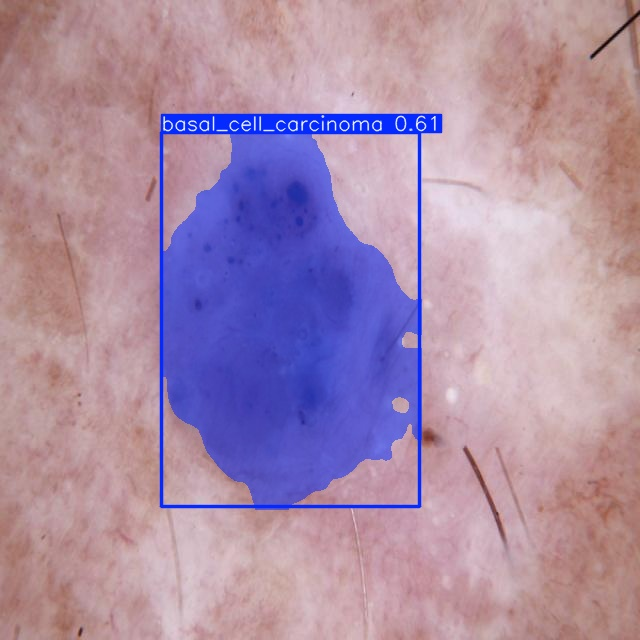

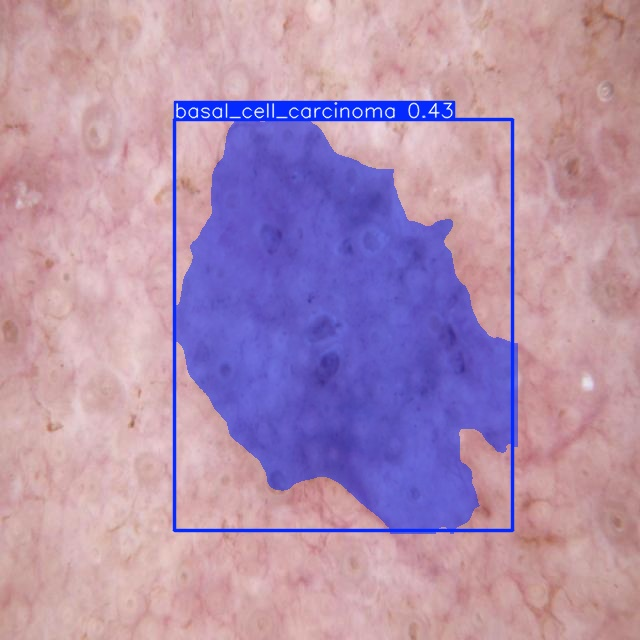

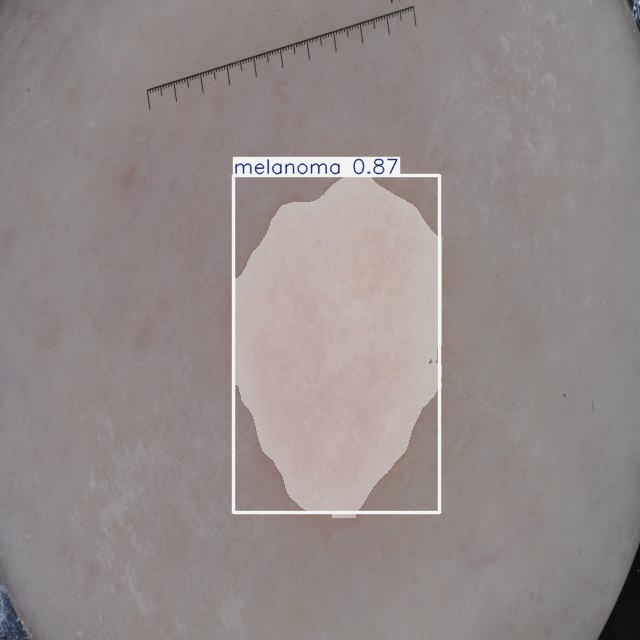

In [14]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/table_for_slide.png'

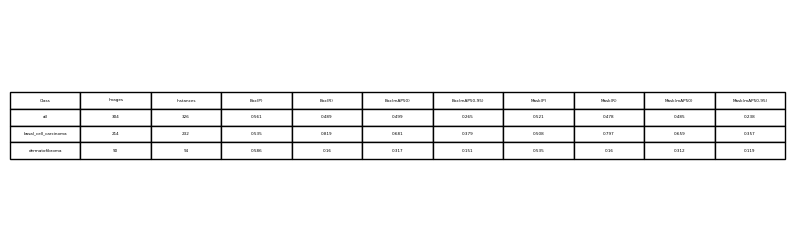

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.table import Table

# Data for the table
data = {
    'Class': ['all', 'basal_cell_carcinoma', 'dermatofibroma'],
    'Images': [304, 214, 90],
    'Instances': [326, 232, 94],
    'Box(P)': [0.561, 0.535, 0.586],
    'Box(R)': [0.489, 0.819, 0.16],
    'Box(mAP50)': [0.499, 0.681, 0.317],
    'Box(mAP50-95)': [0.265, 0.379, 0.151],
    'Mask(P)': [0.521, 0.508, 0.535],
    'Mask(R)': [0.478, 0.797, 0.16],
    'Mask(mAP50)': [0.485, 0.659, 0.312],
    'Mask(mAP50-95)': [0.238, 0.357, 0.119]
}

# Create dataframe
df = pd.DataFrame(data)

# Plot table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Save table as image
plt.savefig('/mnt/data/table_for_slide.png', bbox_inches='tight', dpi=300)

# Show table image path
"/mnt/data/table_for_slide.png"


In [16]:
df

,Class,Images,Instances,Box(P),Box(R),Box(mAP50),Box(mAP50-95),Mask(P),Mask(R),Mask(mAP50),Mask(mAP50-95)
0,all,304,326,0.561,0.489,0.499,0.265,0.521,0.478,0.485,0.238
1,basal_cell_carcinoma,214,232,0.535,0.819,0.681,0.379,0.508,0.797,0.659,0.357
2,dermatofibroma,90,94,0.586,0.160,0.317,0.151,0.535,0.160,0.312,0.119
